### Spam filtering using Naive Bayes

In [36]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix

##### loading data

In [37]:
df = pd.read_csv("data/email.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##### convert "string" category to numbers

In [38]:
df["Category"] = df["Category"].apply(lambda x: 1 if x == "spam" else 0)

#### Short Tutorial: converting text to document-term matrix format using CountVectorizer

In [39]:
vectorizer = CountVectorizer()
text = ['hello this is Maryam',
        'Maryam teaches data mining',
        'Data mining is the process of discovering patterns',
        'Data mining is an easy course']
text_vectorized = vectorizer.fit_transform(text)
count_array = text_vectorized.toarray()
print(count_array)
print(vectorizer.get_feature_names_out())
transformed_data = pd.DataFrame(data=count_array, columns=vectorizer.get_feature_names_out())
print(vectorizer.vocabulary_)
print(transformed_data)

[[0 0 0 0 0 1 1 1 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 1 1 0 0 0 1 0 0]
 [0 0 1 1 0 0 1 0 1 1 1 1 0 1 0]
 [1 1 1 0 1 0 1 0 1 0 0 0 0 0 0]]
['an' 'course' 'data' 'discovering' 'easy' 'hello' 'is' 'maryam' 'mining'
 'of' 'patterns' 'process' 'teaches' 'the' 'this']
{'hello': 5, 'this': 14, 'is': 6, 'maryam': 7, 'teaches': 12, 'data': 2, 'mining': 8, 'the': 13, 'process': 11, 'of': 9, 'discovering': 3, 'patterns': 10, 'an': 0, 'easy': 4, 'course': 1}
   an  course  data  discovering  easy  hello  is  maryam  mining  of  \
0   0       0     0            0     0      1   1       1       0   0   
1   0       0     1            0     0      0   0       1       1   0   
2   0       0     1            1     0      0   1       0       1   1   
3   1       1     1            0     1      0   1       0       1   0   

   patterns  process  teaches  the  this  
0         0        0        0    0     1  
1         0        0        1    0     0  
2         1        1        0    1     0  
3         0     

##### splitting data into train and test

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df["Message"],df["Category"], test_size=0.2)
X_train

4115    Where are you ? What do you do ? How can you s...
2670    we tried to contact you re your response to ou...
3393                      What r u cooking me for dinner?
2204    soon you will have the real thing princess! Do...
1932                  What pa tell me.. I went to bath:-)
                              ...                        
2789    Ü got wat to buy tell us then ü no need to com...
5558                               Sorry, I'll call later
2445       Yes but i dont care! I need you bad, princess!
760     Call me when you/carlos is/are here, my phone'...
1646                      I.ll post her out l8r. In class
Name: Message, Length: 4458, dtype: object

##### convert text emails to numeric values

In [41]:
vectorizer = CountVectorizer(stop_words='english', min_df=2, token_pattern=r"[a-z]+")
X_train_vectorized = vectorizer.fit_transform(X_train)
X_train_array = X_train_vectorized.toarray()
X_train_processed = pd.DataFrame(X_train_array, columns=vectorizer.get_feature_names_out())
X_train_processed.head()

,aah,aathi,ability,abiola,abj,able,absolutly,abt,abta,ac,...,yor,youre,yr,yrs,yummy,yun,yuo,yup,zed,zoe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Train Naive Bayes Classifier

In [42]:
clf = MultinomialNB()
clf.fit(X_train_processed, y_train)

MultinomialNB()

##### Testing the trained calssifier

In [43]:
X_test_vectorized = vectorizer.transform(X_test)
X_test_array = X_test_vectorized.toarray()
X_test_processed = pd.DataFrame(X_test_array, columns=vectorizer.get_feature_names_out())
X_test_processed.head()

,aah,aathi,ability,abiola,abj,able,absolutly,abt,abta,ac,...,yor,youre,yr,yrs,yummy,yun,yuo,yup,zed,zoe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y_predicted = clf.predict(X_test_processed)
print(f"test accuracy is: {accuracy_score(y_test, y_predicted): .2f}")

test accuracy is:  0.98


<Axes: >

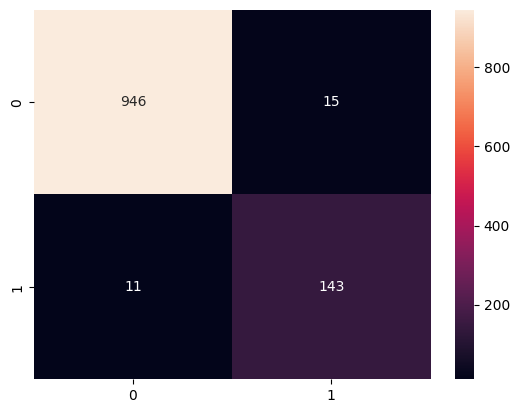

In [45]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt='d')

##### Fun test on two sample emails

In [64]:
test_email_1 = "You have been selected to receive a $1,000 gift card! This exclusive offer is only available for a limited time."
test_email_2 = "Hey, can we get together to watch zoodpaz movie tomorrow?"
test_vectorized = vectorizer.transform([test_email_1, test_email_2])
test_array = test_vectorized.toarray()
test_processed = pd.DataFrame(test_array, columns=vectorizer.get_feature_names_out())
print(f"predicted labels for two emails: {clf.predict(test_processed)}")


predicted labels for two emails: [1 0]
